# Logistic Regression

Logistic Regression is a popular machine learning algorithm used for classification problems. Classification is just like regression but here we predict some small number of discrete values for the output instead of continuous real values. Some examples being predicting whether an email is spam or not, classifying whether an image contains a cat or a dog, diagnosing if a person is suffering from a particular disease or not etc. For the purpose of this assignment we will be working on a Binary Classification problem where the output y can only take 2 values, 0 and 1.For instance, if we are trying to build a spam classifier for email, then $x^{(i)}$ may be some features of a piece of email, and y may be 1 if it is a piece of spam mail, and 0 otherwise. 0 is also called the negative class, and 1 the positive class.

Logistic regression algorithm works by predicting the probability of the positive class given the input data. For doing so it uses sigmoid function which maps the input in the range 0 to 1. Lets see in detail how that works.

\begin{align}
z &= \theta_{1}x_{1} + \theta_{2}x_{2} + ... + \theta_{n}x_{n} + b\\
  &= \theta^{T}x + b\\
P(y=1 | x) &= \frac{1}{1 + e^{-z}}\\
where\; x \in \Re^n
\end{align}

$1/(1 + exp^{-z})$ denotes the sigmoid function and its graph looks like:
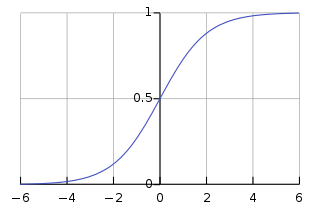

We take a linear combination of the features of a data point with an added bias (this is called an affine transformation) and then apply sigmoid function to the resulting value to get the output in range (0,1). Lets see why it works by considering the geometric interpertation:
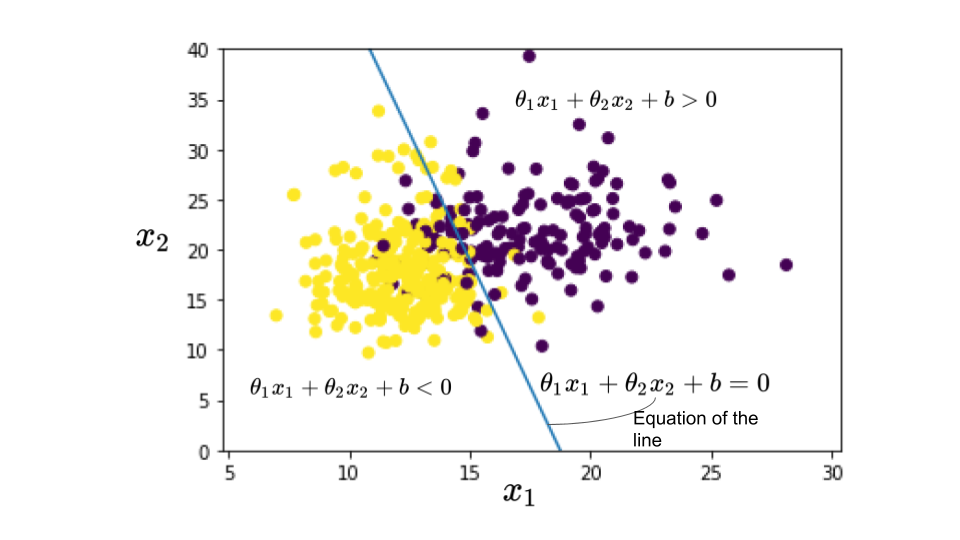

We have our data points arranged in a 2 dimensional space with half of the points been labeled by the purple class and the others by yellow. Lets take the purple points as the positive class (y=1) and yellow points as negative class (y=0). $\theta_{1}x_{1} + \theta_{2}x_{2} + b = 0$ is a line separating purple and yellow points. As you can see from the figure that means the purple points lie on the right side of the line ($\theta_{1}x_{1} + \theta_{2}x_{2} + b > 0$) and yellow points lie on the left ($\theta_{1}x_{1} + \theta_{2}x_{2} + b < 0$)

As we can see from the graph of the sigmoid function, at 0 it becomes 0.5 and approaches 1 and 0 at +inf and -inf respectively. Hence sigmoid($\theta_{1}x_{1} + \theta_{2}x_{2} + b $) will be 0.5 for the points liying on the line, > 0.5 for the points lying on the right side and < 0.5 for the ponts of the left. Hence we classify points with sigmoid($z$) > 0.5 belonging to the positive class and < 0.5 as belonging to the negative class. For more details on logistic regression check the videos on this playlist https://www.youtube.com/watch?v=-la3q9d7AKQ&list=PLNeKWBMsAzboR8vvhnlanxCNr2V7ITuxy

We will be working with breast_cancer dataset which is available in sklearn package. The target values are binary (either 0 or 1) corresponding to whether the tumor is malignant or benign. So this problem can be modelled as binary classification problem. We will use logistic regression which is a method used for binary classification to correctly classify the labels of the class. The dataset has 30 features but for simplicity we will consider only the first two features

Go through the following link to learn more about the dataset

https://scikit-learn.org/stable/datasets/index.html

In [1]:
#importing relevant libraries 
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
%matplotlib inline

Now we will load the dataset and split it into training and testing sets respectively. We train our logistic regression classifier using the training set and evaluate its performance using the test set.

In [2]:
## Dont change code of this block
datapoints = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(datapoints.data, datapoints.target, stratify=datapoints.target, random_state=42)
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)


Q1) Can you tell why we use reshape on y_test and y_train ? (bonus)

To increase their dimension from 1-d to 2-d to use broadcasting

## Task 1: Select first 2 features of the data.

For the purpose of simplicity and ease of visualization we will be working only with the first 2 features of our dataset. Implement the modify function below which takes a numpy 2d array as input with number of rows being the number of datapoints and columns being the features, and selects just the first 2 features (or columns) for all the data points.

In [3]:
#The function will modify X_train by keeping only the first two features 
def modify(X):
    '''
    Inputs:
        -X : Data matrix containing m data points each having n features. Shape [m, n]
    Outputs:
        Modified data matrix containing just the first 2 features of the data points. Shape [m, 2]
    '''
    
    # YOUR CODE HERE
    return X[:,:2]

In [4]:
### SAMPLE TEST CASE
print("Running sample test case")
np.random.seed(0)
a = np.random.rand(10, 4)

ans = np.array([[0.5488135 , 0.71518937],
       [0.4236548 , 0.64589411],
       [0.96366276, 0.38344152],
       [0.56804456, 0.92559664],
       [0.0202184 , 0.83261985],
       [0.97861834, 0.79915856],
       [0.11827443, 0.63992102],
       [0.52184832, 0.41466194],
       [0.45615033, 0.56843395],
       [0.61209572, 0.616934  ]])
assert np.allclose(ans, modify(a), atol = 1e-5)
print("Sample test case passed")

Running sample test case
Sample test case passed


In [5]:
# do not change code here

In [6]:
X_train=modify(X_train)
X_test=modify(X_test)

Plot the 1st two features and corresponding tumor type

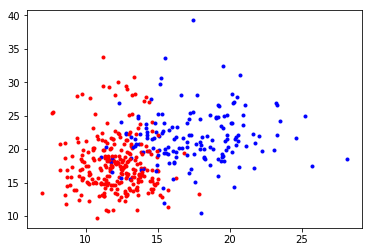

In [7]:
#plot of the feature space


c=0;
for x in y_train:    
    if x==0:
        plt.plot(X_train[c,0],X_train[c,1],'b.')
    if x==1:
        plt.plot(X_train[c,0],X_train[c,1],'r.')
    c=c+1



## Task 2 : Sigmoid Function

Implement the sigmoid function in the function below. The sigmoid function is given by  $\sigma(z) = 1/(1 + exp(-z))$
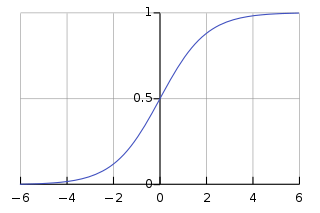

In [8]:

#define the sigmoid function (0.5 marks)
def sigmoid(z):
    '''
    Inputs:
        -z : z can be either a number, a numpy 1d array or a numpy 2d array
    Output:
        sigmoid function applied to z, if z is a vector or a matrix the function must be applied to its each element
        
    '''
    # YOUR CODE HERE
    return 1/(1+np.exp(-z))

In [9]:
### SAMPLE TEST CASES
print("Running sample test case 1:")
assert np.allclose(0.5, sigmoid(0), atol = 1e-5)
print("Test case passed")
print("Running sample test case 2:")
assert np.allclose(np.array([0.73105858, 0.73105858, 0.73105858]), sigmoid(np.array([1,1,1])), atol = 1e-5)
print("Test case passed")
print("Running sample test case 3")
assert np.allclose(np.array([[0.73105858, 0.88079708],
       [0.5       , 0.95257413]]), sigmoid(np.array([[1,2],[0,3]])), atol = 1e-5)
print("Test case passed")

Running sample test case 1:
Test case passed
Running sample test case 2:
Test case passed
Running sample test case 3
Test case passed


In [10]:
# do not change code here

## Task 3: Loss Function

In order to obtain the appropriate values of weights ($\theta_i$) and bias ($b$), we optimize a loss function
which measures the deviation of the model predictions from actual values. We use binary cross entropy loss function (also called log loss) for logistic regression. It is defined as:-
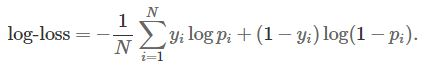
where y is the actual value and p is the predicted value
This loss function is obtained by taking the negative log of the maximum likelihood of y.
Implement the log loss function below which takes as input the actual values and model predictions and outputs the log loss.

In [11]:
#define the log loss function (1 marks)
def log_loss(y,yhat): 
    '''
    Inputs:
        -y : The actual labels from the dataset. Shape [m,1]
        -yhat : Model predictions. Shape [m,1]
    
    Output:
        A scalar value representing the log loss as defined above
    '''
    # YOUR CODE HERE
    try:
        length = len(y)
    except:
        length = 1
    try:
        losses = y*np.log(yhat)+(1-y)*np.log(1-yhat)
    except:
        losses = y*np.log(yhat+1e-09)+(1-y)*np.log(1-yhat+1e-09)
    logloss = -np.sum(losses)/length
    return logloss

In [12]:
### SAMPLE TEST CASE
print("Running sample test case")
assert np.allclose(log_loss(1,0.5),0.6931471805599453, atol = 1e-5)
print("Test case passed")

Running sample test case
Test case passed


In [13]:
# do not change code here


## Task 4: Initialize weights and bias.

In the function below initialize the weights and bias as zeros

In [14]:
#intialize the Weights and bias as zeros (0.5 marks)
def intialize():
    '''
    Return W and b with W being a column vector of size 2 containing 0 and b being a scalar value 0
    '''
    # YOUR CODE HERE
    return np.zeros((2,1)),0

In [15]:
# do not change code here

In [16]:
[W,b]=intialize()

## Task 5: Training the classifier
<style>
  font-size: 100px
</style>
Now that we have defined our loss function and initialized the weights and bias we can start training our classifier. We train the classifier by minimizing the loss function with respect to the weights and bias. To carry out the optimization we use Gradient descent which works as:


Repeat till convergence: <br>
&emsp;<font size = 4> $\theta^{(i+1)} = \theta^{(i)} - \alpha\frac{\partial L}{\partial \theta}$</font>  <br>
where $\alpha$ is the learning rate

The derivative of the log loss function with respect to weights and bias are given as:

<font size = "4">$\frac{\partial L}{\partial \theta_{i}} = (\frac{1}{m})\sum_{j = 1}^{m}{(y'^{(j)} - y^{(j)})x_i^{(j)}}$</font><br>
<br>
<font size = "4">$\frac{\partial L}{\partial b} = (\frac{1}{m})\sum_{j = 1}^{m}{(y'^{(j)} - y^{(j)})}$<br>
<br></font>
<font size = "4">$where \; y'^{(j)} = \frac{1}{1 + e^{-(\theta^{T}x^{(j)})}}$</font>

Please note that the superscripts identifies the data point and the subscript denotes the feature i.e. $x_{1}^{(2)}$ will denote the first feature of the second data point. $y$ is the actual label and $y'$ is the value predicted by the model. Once we have the derivatives we can use gradient descent to update the parameters.
<font size = "4">$\theta_{i} = \theta_{i} - \alpha\frac{\partial L}{\partial \theta_i}$</font>
<br>
<font size = "4">$b = b - \alpha\frac{\partial L}{\partial b}$</font>

Follow the following steps to implement the function:
~~~
    1. Initialize weights and bias
    2. Repeat till convergence:
        2.1 Compute the weighted sum with added bias (w1x1 + w2x2 + b) for all the data points
        2.2 Apply sigmooid function to the resulting value to get model prediction
        2.3 Compute the loss function
        2.4 Compute the derivative w.r.t the weights and bias using the equations mentioned above
        2.5 Using the derivatives update the weights and bias using the gradient descent update rule
    3. Return the final weights and bias
~~~


In [17]:
'''Implement the update equations for gradient descent and run it for 10000 iterations.
   Append the loss values to losses list after every 100 iterations'''
# (1.5 marks)
def train(X_train,y_train, lr = 0.02):
    '''
    Inputs:
        - X_train : Training data matrix. shape [m,n]
        - y_train : Training labels. shape [m,1]
        - lr : learning rate for the gradient descent algorithm
    Outputs:
        weights W (shape [2,1]) and bias b (scalar value)
    '''
    losses=[]
    [W,b]=intialize()
    for epoch in range(10000):
        m=len(X_train)
        # YOUR CODE HERE
        a = np.matmul(X_train,W)+np.array([[b]])
        z = sigmoid(a)
        loss = log_loss(y_train,z)
        losses.append(loss)
        b_derivative = np.sum(z-y_train)/len(z)
        w_derivative = (np.sum((z-y_train)*X_train,axis=0)/len(z)).reshape(-1,1)
        W = W - lr*w_derivative
        b = b - lr*b_derivative
            
    return [W,b,losses]

In [18]:
### SAMPLE TEST CASES
W,b,a = train(X_train, y_train)
print("Running sample test case1")
assert np.allclose(a[0],0.6931471805599453)
print("Test case passed")
print("Running sample test case 2")
assert np.allclose(W,np.array(np.array([[-0.4596111 ],
       [-0.02750468]])))
print("Test case passed")

Running sample test case1
Test case passed
Running sample test case 2
Test case passed


In [19]:
# do not change code here


[[-0.4596111 ]
 [-0.02750468]]
7.492717989037693


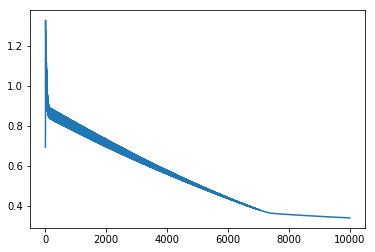

In [20]:
#lets look at the parameters obtained after training
[W,b,a]=train(X_train,y_train)
print(W)
print(b)
plt.plot(a)

## Task 6 : Predict

Now that we have obtained suitable weights and biases we can use our logistic regression model to give predictions on a given set of data. Implement the predict function below which takes as input a matrix containing the data points and returns the predictions for all the points. Label all the points as 1 which have model outputs greater than 0.5 and 0 which have model outputs less than 0.5

In [21]:
#calculate the labels for training examples and populate the list preds (0.5 marks)
def predict(X, W, b):
    '''
    Inputs:
        -X : Data matrix. Shape [m,n]
        -W : Weights of logistic regression model
        -b : bias of logistic regression model
    
    Output:
        predictions array of size m containing 0's or 1's representing negative and postive class respectively. 
    '''
    preds=[]
    # YOUR CODE HERE
    a = np.matmul(X,W)+np.array([[b]])
    z = sigmoid(a)
    preds = (z>0.5)+np.zeros((a.shape[0],1))
    return preds

In [22]:
### SAMPLE TEST CASE
print("Running sample test case 1")
preds=predict(X_train, W, b)
assert np.allclose(preds[0],0)
print("Test case passed")
print("Running sample test case 2")
assert np.allclose(preds[1],1)
print("Test case passed")

Running sample test case 1
Test case passed
Running sample test case 2
Test case passed


In [23]:
# do not change code here


## Task 7 : Find Accuracy (0.25 marks)

Your final task for this assignment is to compute the accuracy of our classifier. Implement the find_accuracy function which takes as the input the predictions of our classifier and the actual labels and computes the accuracy. We define accuracy as the ratio between number of correctly classified examples and total number of examples. For eg. if a classifier classifies 20 out of 100 examples correctly then the accuracy will be 20%. You should expect 89% accuracy on the training set and 87% accuracy on the test set.

In [24]:
def find_accuracy(y_preds, y_true):
    '''
    Calculates the accuracy of the classifier.
    
    Inputs:
        -y_preds : Predictions by KNN Classifier
        -y_true : Actual labels
        
    Output:
        Accuracy in percentage which is defined as : 100*number_of_correctly_classified_examples/total_examples
    '''
    
    acc = 0
    # YOUR CODE HERE
    acc=1.0*np.sum(y_preds==y_true)/len(y_preds)

    return acc

In [25]:
preds_train = predict(X_train, W, b)
preds_test = predict(X_test, W, b)
acc_train = find_accuracy(preds_train, y_train)
acc_test = find_accuracy(preds_test, y_test)
print(acc_train)
print(acc_test)

0.8873239436619719
0.8881118881118881


In [26]:
### HIDDEN TEST CASE

### BEGIN TEST
assert np.allclose(acc_train, 0.8873239436619719, atol = 1e-4)
assert np.allclose(acc_test, 0.8881118881118881, atol = 1e-4)
### END TEST

(0, 40)

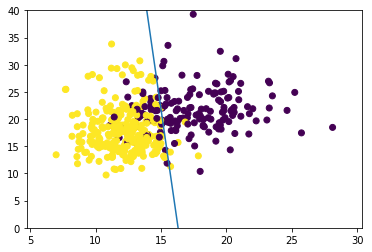

In [27]:
#the following code prints the decision boundry for our problem on the training dataset
plt.scatter(X_train[:,0],X_train[:,1],c=y_train.ravel())
ax=plt.gca()
xvals=np.array(ax.get_xlim()).reshape(-1,1)
yvals=-(xvals*W[0][0]+b)/W[1][0]
plt.plot(xvals,yvals)
plt.ylim(0,40)

# Summary

We have implemented a simple logistic regression in this notebook. We have taken two features so that it is easy to visualize this problem. We can use additional features while training and you can try implementing this algorithm with more number of features.